<a href="https://colab.research.google.com/github/sindhujanayudu/-LGMVIP--DataScience/blob/main/beginner%20level%20task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BEGINNER LEVEL TASK - 2
STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM



Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix, classification_report, f1_score

LOADING THE DATASET

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

EXPLORATORY DATA ANALYSIS

In [ ]:
df.shape

(2035, 8)

In [ ]:
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail(3)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<ipython-input-8-99a9a68a22ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

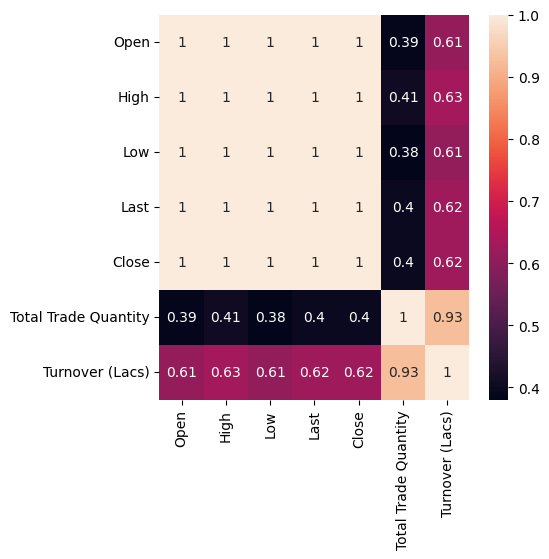

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1.shape

(2035,)

In [ ]:
df1.head(3)

0    233.75
1    233.25
2    234.25
Name: Close, dtype: float64

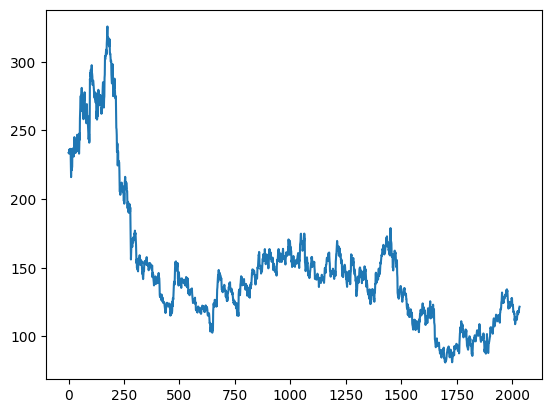

In [ ]:
plt.plot(df1)

TEST FOR STATIONARY

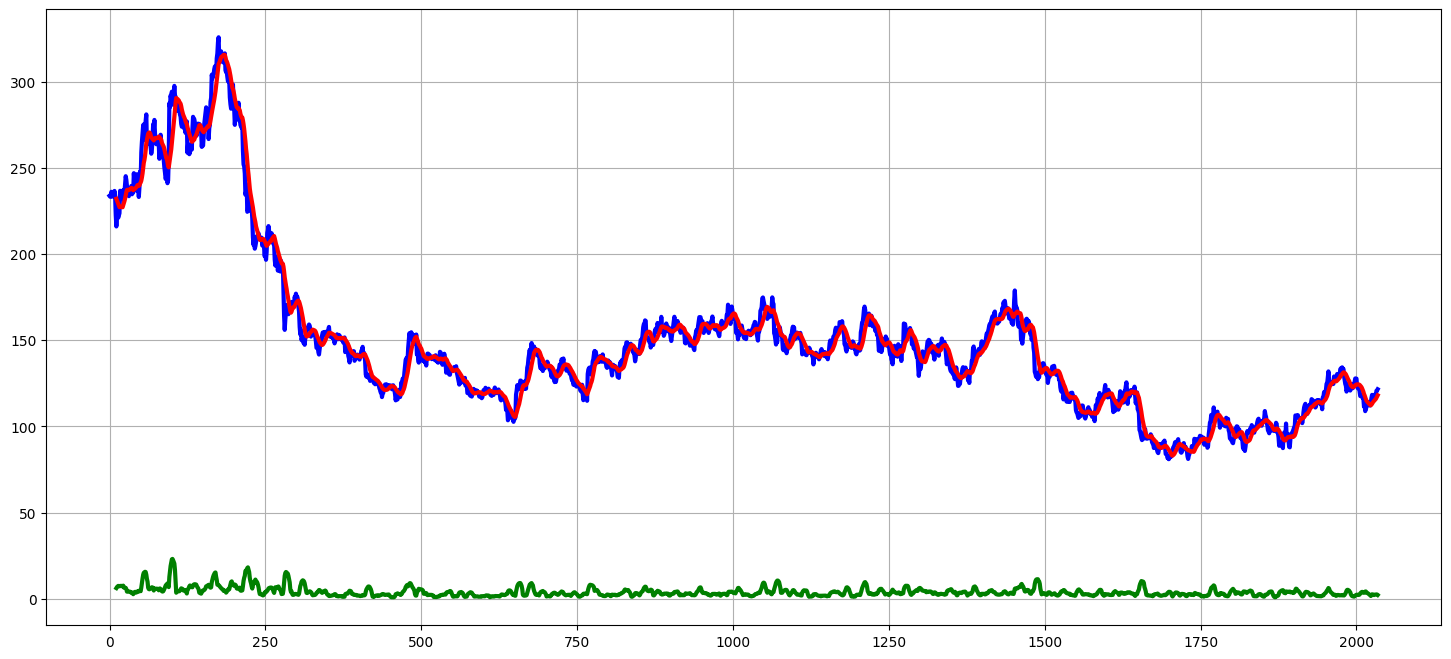

name 'adfuller' is not defined


In [ ]:
def stationary_test(time_series):
    try:
        rolling_mean = time_series.rolling(12).mean()
        rolling_std = time_series.rolling(12).std()

        plt.figure(figsize=(18,8))
        plt.grid('both')
        plt.plot(time_series, color='blue', label='Orginal', linewidth=3)
        plt.plot(rolling_mean, color='red', label='Rolling Mean', linewidth=3)
        plt.plot(rolling_std, color='green', label='Rolling Std', linewidth=3)
        plt.show()
        
        adft = adfuller(time_series, autolag='AIC')
        output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No of lags', 'No of observation used'])
        
        for key, values in adft[4].items():
            output['critical value (%s)'%key]=values
        
        print(output)
    
    except Exception as e:
        print(e)
stationary_test(df1) 

SCALARIZATION

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1.shape)
df1

(2035, 1)


array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

MODEL TRAINING,TESTING AND EVALUATION

In [ ]:
training_data,testing_data = train_test_split(df1,test_size=0.35)

In [ ]:
print(training_data.shape)
print(testing_data.shape)

(1322, 1)
(713, 1)


dividing the dataset in features and target variable depending upon size of 2x2 matrix.

In [ ]:
def create_dataset(data,size=1):
    x=[]
    y=[]
    for i in range(len(data)-size-1):
        a = data[i:(i+size),0]
        x.append(a)
        y.append(data[i+size,0])
    return np.array(x),np.array(y)

size = 100
x_train, y_train = create_dataset(training_data, size)
x_test, y_test = create_dataset(training_data, size)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1221, 100)
(1221,)
(1221, 100)
(1221,)


Reshaping the train and test datasets

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1221, 100, 1)
(1221,)
(1221, 100, 1)
(1221,)


Stacked LSTM with 3 sequential data and then dense

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

return_sequences=it will output all the hidden states of each time steps.

In [23]:
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Summary of the model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Fitting the dataset

In [25]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1) 

Epoch 1/100
20/20 [==============================] - 16s 468ms/step - loss: 0.0448 - val_loss: 0.0373
Epoch 2/100
20/20 [==============================] - 7s 342ms/step - loss: 0.0378 - val_loss: 0.0369
Epoch 3/100
20/20 [==============================] - 6s 319ms/step - loss: 0.0369 - val_loss: 0.0366
Epoch 4/100
20/20 [==============================] - 6s 279ms/step - loss: 0.0367 - val_loss: 0.0366
Epoch 5/100
20/20 [==============================] - 7s 352ms/step - loss: 0.0372 - val_loss: 0.0371
Epoch 6/100
20/20 [==============================] - 5s 274ms/step - loss: 0.0368 - val_loss: 0.0368
Epoch 7/100
20/20 [==============================] - 7s 368ms/step - loss: 0.0372 - val_loss: 0.0365
Epoch 8/100
20/20 [==============================] - 5s 271ms/step - loss: 0.0369 - val_loss: 0.0376
Epoch 9/100
20/20 [==============================] - 7s 340ms/step - loss: 0.0381 - val_loss: 0.0364
Epoch 10/100
20/20 [==============================] - 5s 270ms/step - loss: 0.0375 - val_l

prediction and performance of metrics

In [26]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

39/39 [==============================] - 2s 49ms/step


Transform back to original form

In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculate RMSE performance metrics

In [30]:
math.sqrt(mean_squared_error(y_train,train_predict))

153.37369628363243